In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 


In [3]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_df = churn_data.copy()
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Определение категориальных признаков
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')

churn_df['Exited'] = churn_df['Exited'].apply(lambda x: 'лояльный' if x == 0 else 'ушедший').astype('category')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


#### 9.1. Каково соотношение ушедших и лояльных клиентов? 

Покажите это на графике и дайте комментарий по соотношению.

In [80]:
exited_data = churn_df.groupby(by='Exited',as_index=False, observed=True).nunique()

fig = px.pie(
    exited_data,
    values='CustomerId',
    names='Exited',
    title= 'Соотношение ушедших и лояльных клиентов',
    height=400,
    width=500
    );

fig.update_traces(textposition='outside', 
                  textinfo='percent+label')
fig.update_layout(showlegend=False)

fig.show()

Из 10 тысяч рассматриваемых клиентов банка **более 20%** или 2 037 клиентов, отказались от услуг банка. 

### 9.2. Постройте график, 
- показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов
- опишите распределение и сделайте выводы.

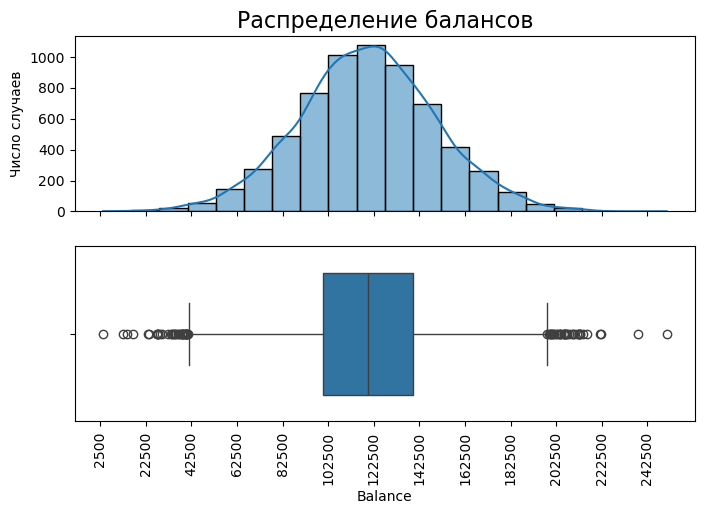

In [45]:
mask = churn_df['Balance'] > 2500
ower_balance = churn_df[mask]


fig, axes = plt.subplots(nrows=2, 
                         ncols=1, 
                         figsize =(8,5), 
                         gridspec_kw={'hspace': 0.2},
                         sharex=True)

sns.histplot(
        data=ower_balance,
        x='Balance',
        bins=20,
        kde=True,
        ax = axes[0]
        );
axes[0].set_title('Распределение балансов', fontsize=16)
axes[0].set_xlabel('Сумма баланса')
axes[0].set_ylabel('Число случаев')
#axes[0].set_xticks(range(2500, 250000, 20000))
#axes[0].xaxis.set_tick_params(rotation=90)

sns.boxplot(
        data=ower_balance,
        x='Balance',
        orient='h',
        width=0.7,
        ax=axes[1]
);
#axes[1].set_title('Распределение балансов свыше 2500')
axes[1].set_xticks(range(2500, 250000, 20000))
axes[1].xaxis.set_tick_params(rotation=90)


Если не учитывать вклады меньше 2500 долларов, то наибольшее количество вкладов распределилось между вкладами на сумму **102 500**  и **142 500** долларов. Средняя сумма вклада отмечена на уровне **122 500** доллара.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 

- Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
- Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

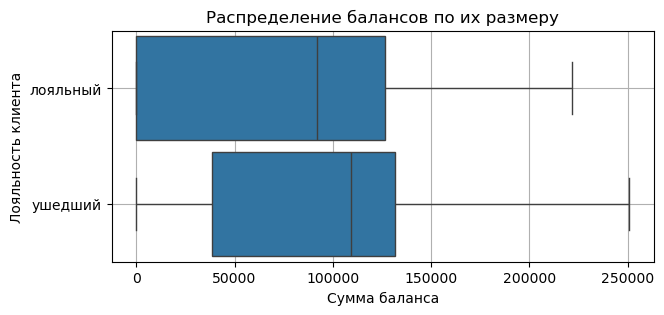

In [52]:
fig = plt.figure(figsize=(7, 3))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение балансов по их размеру');
boxplot.set_xlabel('Сумма баланса');
boxplot.set_ylabel('Лояльность клиента');
boxplot.grid()


Суммы на балансах ушедших более сконцентрированы, а так же характеризуются более крупными суммами, на что указывает правое положение медианы и более джлинный правый ус.
Таким образом в категорию ушедших попадают более крупные клиенты.
Отток крупных вкладчиков может быть вызван:
- неудовлтворенностью последних условиями обслуживания
- отсутсвием выгодных предложений для пролонгации вкладов


### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
- В какой группе больше потенциальных выбросов? 
- На какую возрастную категорию клиентов стоит обратить внимание банку?

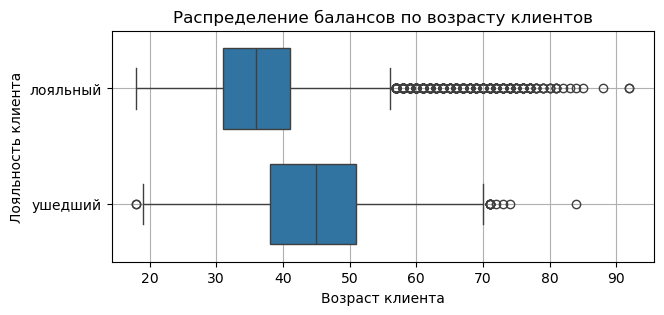

In [51]:
fig = plt.figure(figsize=(7,3))
me_box = sns.boxplot(
    data= churn_df,
    y='Exited',
    x='Age',
    width=0.7
)
me_box.set_title('Распределение балансов по возрасту клиентов')
me_box.set_xlabel('Возраст клиента')
me_box.set_ylabel('Лояльность клиента')
me_box.grid()

- Контингент ушедших клиентов является более возрастным, средний возраст ушедших 45 лет, средний возраст лояльных около 35 лет.
- В группе лояльных клиентов, наибольшее количество потенциальных выбросов - клиенты с возрастом от 55 лет и старше.
- Банку необходимо обратить внимание на возрастную категорию клиентов от 40 до 50 лет, так как таких клиентов больше всего в категории ушедших.

### 9.5. Постройте график,  
- который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
- Добавьте расцветку по признаку оттока клиентов. 
- Какова взаимосвязь между признаками? 
- Если не видите явной взаимосвязи, укажите это.

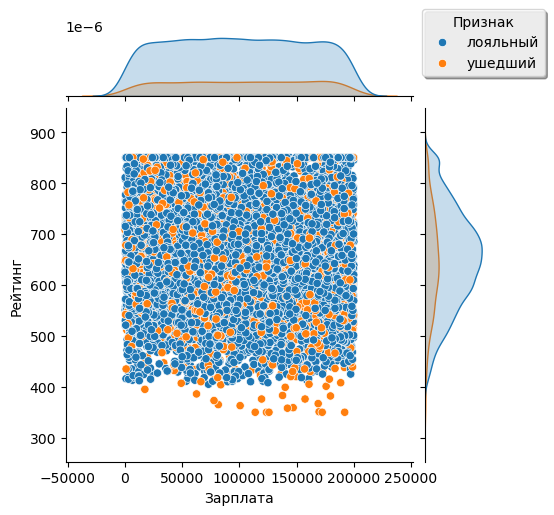

In [ ]:
me_Corr = sns.jointplot(
    data = churn_df,
    y= 'CreditScore',
    x= 'EstimatedSalary',
    hue='Exited',
    height=5,
);
me_Corr.set_axis_labels("Зарплата", "Рейтинг");

# Получаем легенду и меняем её прозрачность
legend = me_Corr.ax_joint.legend_
legend.set_title ('Признак')
#legend.get_frame().set_alpha(0.5)  # прозрачность от 0 (невидимая) до 1 (полная видимость)
legend.set_loc('upper right')
legend.set_bbox_to_anchor((1.4,1.3))
legend.shadow=True
legend.set_zorder(100)


Диаграмма рассеивания указывает на отсутсвие связи между кредитным рейтингом и уровнем предполагаемой зарплаты.

Обращает на себя внимание, что ушли практически все клиенты банка с рейтингом ниже 400

### 9.6. Кто чаще уходит, 
- мужчины или женщины? 
- Постройте график, который иллюстрирует это.

In [235]:
#grp_gender = churn_df.groupby(['Gender','Exited'])[['CustomerId']].nunique()
all_gender = churn_df.pivot_table(
    values='CustomerId',
    index='Exited',
    columns='Gender',
    aggfunc='nunique',
    observed=True)

# Подсчет вероятности ухода женьщины 
all_gender['p_Female'] = round(all_gender['Female']/all_gender['Female'].sum()*100,1)

# Подсчет вероятности ухода мужчины
all_gender['p_Male'] = round(all_gender['Male']/all_gender['Male'].sum()*100,1)

all_gender = all_gender.reset_index().melt(id_vars='Exited', var_name='Gender', value_name='value')

#pivot_df_reset = pivot_df.reset_index().melt(id_vars='Month', var_name='Category', value_name='Sales')

display(all_gender)

# sns.barplot(
#     data=all_gender,
#     orient='v'
# )


,Exited,Gender,value
0,лояльный,Female,3404.0
1,ушедший,Female,1139.0
2,лояльный,Male,4559.0
3,ушедший,Male,898.0
4,лояльный,p_Female,74.9
5,ушедший,p_Female,25.1
6,лояльный,p_Male,83.5
7,ушедший,p_Male,16.5
